## Sequential Backward Selection (SFS)

In [1]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector

### Import dataset

In [2]:
df = pd.read_csv("Finaltest.csv")

In [3]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,date_registration,date_unregistration,final_result
0,1,1,24213,0,0,2,4,0,0,90,...,0,0,0,0,0,0,0,-128,-46,0
1,1,1,40419,1,1,1,2,1,0,60,...,4,3,2,1,3,14,10,-46,171,0
2,1,1,41060,1,2,3,7,0,0,60,...,34,2,5,0,22,87,6,-24,0,1
3,1,1,43284,1,1,1,8,0,2,180,...,47,22,9,2,32,87,36,-28,226,0
4,1,1,45664,1,3,3,6,0,1,60,...,27,0,6,2,54,123,64,-31,0,1


### Drop columns

In [4]:
#df=df.drop(columns='id_student')
df=df.drop(columns='code_module')
df=df.drop(columns='code_presentation')
df=df.drop(columns='date_unregistration')
df=df.drop(columns='date_registration')

In [5]:
df.shape

(1303, 23)

In [6]:
df.isnull().sum()

id_student               0
gender                   0
region                   0
highest_education        0
imd_band                 0
age_band                 0
num_of_prev_attempts     0
studied_credits          0
disability               0
total_number_of_click    0
total_score              0
externalquiz             0
forumng                  0
glossary                 0
homepage                 0
oucontent                0
ouelluminate             0
ouwiki                   0
page                     0
resource                 0
subpage                  0
url                      0
final_result             0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,final_result


In [8]:
X = df.iloc[:,0:22]
y = df.iloc[:,-1]

In [9]:
X

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2693243,0,3,1,5,1,0,60,0,2643,...,310,1,163,31,9,24,1,101,360,200
1299,2694933,0,1,2,1,0,0,60,1,935,...,87,0,76,19,16,14,1,45,81,30
1300,2697773,0,0,2,6,0,0,60,0,148,...,14,0,7,1,0,3,2,6,35,18
1301,2707979,0,1,1,6,0,0,120,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

0       0
1       0
2       1
3       0
4       1
       ..
1298    1
1299    1
1300    1
1301    1
1302    1
Name: final_result, Length: 1303, dtype: int64

In [11]:
X.head()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64


### Train and Fit dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

### Sequential Backward Selection

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
X_train.shape

(912, 22)

In [15]:
forward_feature_selection = SequentialFeatureSelector(DecisionTreeClassifier(),
                                                     k_features= 1,
                                                     forward=False,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)
forward_feature_selection.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.5s finished

[2022-11-03 01:14:36] Features: 21/1 -- score: 0.8392861084396236[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s finished

[2022-11-03 01:14:36] Features: 20/1 -- score: 0.8400110190132528[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished

[2022-11-03 01:14:37] Features: 19/1 -- score: 0.8376052775905538[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

{22: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21),
  'cv_scores': array([0.82987552, 0.85355649, 0.82157676, 0.82758621, 0.81327801]),
  'avg_score': 0.8291745965417263,
  'feature_names': ('id_student',
   'gender',
   'region',
   'highest_education',
   'imd_band',
   'age_band',
   'num_of_prev_attempts',
   'studied_credits',
   'disability',
   'total_number_of_click',
   'total_score',
   'externalquiz',
   'forumng',
   'glossary',
   'homepage',
   'oucontent',
   'ouelluminate',
   'ouwiki',
   'page',
   'resource',
   'subpage',
   'url')},
 21: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21),
  'cv_scores': array([0.84033613, 0.84033613, 0.84033613, 0.84615385, 0.82926829]),
  'avg_score': 0.8392861084396236,
  'feature_names': ('id_student',
   'gender',
   'r

In [16]:
forward_feature_selection.k_feature_idx_

(10,)

In [17]:
forward_feature_selection.k_feature_names_

('total_score',)

In [18]:
forward_feature_selection.k_score_

0.8456042734185905

In [26]:
download=pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
download.to_csv("backward.decisiontree.csv")
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8230452674897119, 0.8412017167381973, 0.816...",0.822941,"(id_student, gender, region, highest_education...",0.012489,0.009717,0.004859
21,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[0.8416666666666667, 0.8499999999999999, 0.853...",0.835776,"(id_student, gender, region, highest_education...",0.021206,0.016499,0.008249
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[0.8170212765957446, 0.8487394957983193, 0.843...",0.83301,"(id_student, gender, region, highest_education...",0.015066,0.011722,0.005861
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,...","[0.8270042194092827, 0.8595744680851064, 0.813...",0.833281,"(id_student, gender, region, highest_education...",0.019156,0.014904,0.007452
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16,...","[0.8403361344537815, 0.8487394957983193, 0.829...",0.837097,"(id_student, gender, region, highest_education...",0.008998,0.007001,0.0035
17,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 14, 15, 16, 17...","[0.8368200836820084, 0.8619246861924686, 0.826...",0.841003,"(id_student, gender, region, highest_education...",0.015009,0.011678,0.005839
16,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 14, 16, 17, 18...","[0.8181818181818183, 0.8717948717948718, 0.829...",0.83718,"(id_student, gender, region, highest_education...",0.02514,0.01956,0.00978
15,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 16, 17, 18, 20...","[0.8354430379746834, 0.859504132231405, 0.8205...",0.839666,"(id_student, gender, region, highest_education...",0.0161,0.012527,0.006263
14,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 16, 18, 20, 21)","[0.8270042194092827, 0.8870967741935484, 0.832...",0.8464,"(id_student, gender, region, highest_education...",0.028997,0.022561,0.011281
13,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 18, 20, 21)","[0.8583333333333334, 0.8619246861924686, 0.834...",0.847632,"(id_student, gender, region, highest_education...",0.015656,0.012181,0.006091


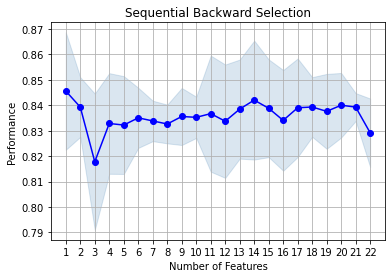

In [20]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection')
plt.grid()
plt.show()

In [21]:
forward_feature_selection = SequentialFeatureSelector(DecisionTreeClassifier(),
                                                     k_features= (1,1),
                                                     forward=False,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.5s finished

[2022-11-03 01:14:43] Features: 21/1 -- score: 0.8357758292131002[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s finished

[2022-11-03 01:14:43] Features: 20/1 -- score: 0.8330100124999928[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished

[2022-11-03 01:14:44] Features: 19/1 -- score: 0.8332813655295871[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [22]:
forward_feature_selection.k_feature_names_

('total_score',)

In [23]:
forward_feature_selection.k_score_

0.8456042734185905

In [24]:

pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8230452674897119, 0.8412017167381973, 0.816...",0.822941,"(id_student, gender, region, highest_education...",0.012489,0.009717,0.004859
21,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[0.8416666666666667, 0.8499999999999999, 0.853...",0.835776,"(id_student, gender, region, highest_education...",0.021206,0.016499,0.008249
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[0.8170212765957446, 0.8487394957983193, 0.843...",0.83301,"(id_student, gender, region, highest_education...",0.015066,0.011722,0.005861
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,...","[0.8270042194092827, 0.8595744680851064, 0.813...",0.833281,"(id_student, gender, region, highest_education...",0.019156,0.014904,0.007452
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16,...","[0.8403361344537815, 0.8487394957983193, 0.829...",0.837097,"(id_student, gender, region, highest_education...",0.008998,0.007001,0.0035
17,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 14, 15, 16, 17...","[0.8368200836820084, 0.8619246861924686, 0.826...",0.841003,"(id_student, gender, region, highest_education...",0.015009,0.011678,0.005839
16,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 14, 16, 17, 18...","[0.8181818181818183, 0.8717948717948718, 0.829...",0.83718,"(id_student, gender, region, highest_education...",0.02514,0.01956,0.00978
15,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 16, 17, 18, 20...","[0.8354430379746834, 0.859504132231405, 0.8205...",0.839666,"(id_student, gender, region, highest_education...",0.0161,0.012527,0.006263
14,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 16, 18, 20, 21)","[0.8270042194092827, 0.8870967741935484, 0.832...",0.8464,"(id_student, gender, region, highest_education...",0.028997,0.022561,0.011281
13,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 18, 20, 21)","[0.8583333333333334, 0.8619246861924686, 0.834...",0.847632,"(id_student, gender, region, highest_education...",0.015656,0.012181,0.006091


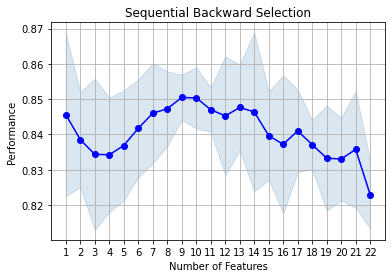

In [25]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection')
plt.grid()
plt.show()